In [33]:
import pandas as pd
import numpy as np
from math import sqrt
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [34]:

df = pd.read_csv ('gardens.csv')
# Original : df = pd.read_csv ('data.csv')

In [35]:
df[0:5]

,NAME,LATITUDE,LONGITUDE,My Latitude,My Longitude,Distance between in Km,Euclidean Ranking,Eucledian Distance,Manhattan Ranking,Manhattan Distance,Minkowski Ranking,Minkowski Distance
0,New York Botanical Garden,40.863880,-73.878268,40.7128,-74.006,0.1519,4.0,0.197840,4.0,0.278812,4.0,0.197840
1,Brooklyn Botanic Garden,40.667315,-73.963407,40.7128,-74.006,0.0455,1.0,0.062314,2.0,-0.002891,1.0,0.062314
2,Queens Botanical Garden,40.750457,-73.829575,40.7128,-74.006,0.0377,3.0,0.180399,3.0,0.214082,3.0,0.180399
3,Snug Harbor Cultural Center and Botanical Garden,40.645101,-74.104556,40.7128,-74.006,0.0677,2.0,0.119568,1.0,-0.166255,2.0,0.119568
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df

,NAME,LATITUDE,LONGITUDE,My Latitude,My Longitude,Distance between in Km,Euclidean Ranking,Eucledian Distance,Manhattan Ranking,Manhattan Distance,Minkowski Ranking,Minkowski Distance
0,New York Botanical Garden,40.863880,-73.878268,40.7128,-74.006,0.1519,4.0,0.197840,4.0,0.278812,4.0,0.197840
1,Brooklyn Botanic Garden,40.667315,-73.963407,40.7128,-74.006,0.0455,1.0,0.062314,2.0,-0.002891,1.0,0.062314
2,Queens Botanical Garden,40.750457,-73.829575,40.7128,-74.006,0.0377,3.0,0.180399,3.0,0.214082,3.0,0.180399
3,Snug Harbor Cultural Center and Botanical Garden,40.645101,-74.104556,40.7128,-74.006,0.0677,2.0,0.119568,1.0,-0.166255,2.0,0.119568
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#Set values to numerical categorical


# NY Garden = 1
df.loc [0,['Name']] = [1]

# Brooklyn Garden = 2
df.loc [1,['Name']] = [2]

# Queens Gardern = 3
df.loc [2,['Name']] = [3]

# Snug Garden = 4
df.loc [3,['Name']] = [4]

"""
# Original 
#Iris-Setosa = 1
df.loc [22:33,['Class']] = [1]

#Iris-Versicolor = 2
df.loc [0:21,['Class']] = [2]

#Iris-Virginica = 3
df.loc [34:48,['Class']] = [3]
"""

df

,NAME,LATITUDE,LONGITUDE,My Latitude,My Longitude,Distance between in Km,Euclidean Ranking,Eucledian Distance,Manhattan Ranking,Manhattan Distance,Minkowski Ranking,Minkowski Distance,Name
0,New York Botanical Garden,40.863880,-73.878268,40.7128,-74.006,0.1519,4.0,0.197840,4.0,0.278812,4.0,0.197840,1.0
1,Brooklyn Botanic Garden,40.667315,-73.963407,40.7128,-74.006,0.0455,1.0,0.062314,2.0,-0.002891,1.0,0.062314,2.0
2,Queens Botanical Garden,40.750457,-73.829575,40.7128,-74.006,0.0377,3.0,0.180399,3.0,0.214082,3.0,0.180399,3.0
3,Snug Harbor Cultural Center and Botanical Garden,40.645101,-74.104556,40.7128,-74.006,0.0677,2.0,0.119568,1.0,-0.166255,2.0,0.119568,4.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Rename Columns

df.rename(columns= {'LATITUDE': 'LT'}, inplace= True)
df.rename(columns= {'LONGITUDE': 'LO'}, inplace= True)
df.rename(columns= {'My Latitude': 'm_LT'}, inplace= True)
df.rename(columns= {'My Longitude': 'm_LO'}, inplace= True)
df.rename(columns= {'NAME': 'Garden Name'}, inplace= True)


In [39]:
df[0:5]

,Garden Name,LT,LO,m_LT,m_LO,Distance between in Km,Euclidean Ranking,Eucledian Distance,Manhattan Ranking,Manhattan Distance,Minkowski Ranking,Minkowski Distance,Name
0,New York Botanical Garden,40.863880,-73.878268,40.7128,-74.006,0.1519,4.0,0.197840,4.0,0.278812,4.0,0.197840,1.0
1,Brooklyn Botanic Garden,40.667315,-73.963407,40.7128,-74.006,0.0455,1.0,0.062314,2.0,-0.002891,1.0,0.062314,2.0
2,Queens Botanical Garden,40.750457,-73.829575,40.7128,-74.006,0.0377,3.0,0.180399,3.0,0.214082,3.0,0.180399,3.0
3,Snug Harbor Cultural Center and Botanical Garden,40.645101,-74.104556,40.7128,-74.006,0.0677,2.0,0.119568,1.0,-0.166255,2.0,0.119568,4.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Re-arrange the columns:

df = df[['Garden Name', 'LT','LO','m_LT','m_LO']]

In [41]:
df

,Garden Name,LT,LO,m_LT,m_LO
0,New York Botanical Garden,40.863880,-73.878268,40.7128,-74.006
1,Brooklyn Botanic Garden,40.667315,-73.963407,40.7128,-74.006
2,Queens Botanical Garden,40.750457,-73.829575,40.7128,-74.006
3,Snug Harbor Cultural Center and Botanical Garden,40.645101,-74.104556,40.7128,-74.006
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN


In [42]:
#Data Splitting
train = df.iloc[0:1] # NY and BRK for training
test = df.iloc[2:3] # Q and SNG for test

In [43]:
def euclidean_distance(row1, row2, columns, label):
    distance = 0.0

    for column in columns:
        #Only euclidean distance for features is calculated
        if column != label:
            distance += (row1[column] - row2[column])**2

    return sqrt(distance)

def manhattan_distance(row1, row2, columns, label):
    distance = 0.0

    for column in columns:
        if column != label:
            distance += abs(row1[column] - row2[column])

    return distance

def minkowski_distance(point1, point2, p):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same number of elements/dimensions")

    if p <= 0:
        raise ValueError("Parameter p must be greater than 0")

    distance = 0
    n = len(point1)

    for i in range(n):
        distance += abs(point1[i] - point2[i]) ** p

    return distance ** (1 / p)


In [44]:
def KNN(train, test_row, k, label):
    temp = train.copy()

    #Calculate distance for each instance in train to single test instance
    temp['dist'] = temp.apply(lambda row: euclidean_distance(row, test_row, train.columns, label), axis=1)

    # Manhattan distance
    # temp['dist'] = temp.apply(lambda row: manhattan_distance(row, test_row, train.columns, label), axis=1)
    
    # Manhattan distance
    # temp['dist'] = temp.apply(lambda row: minkowski_distance(row, test_row, train.columns, label), axis=1)

    #Getting the k neighbors having minimum distances
    sorted_distances = temp['dist'].sort_values()
    k_neighbors_distances = sorted_distances [:k]
    

    #Getting the majority label from the k neighbors
    k_neighbors = temp[temp.index.isin(k_neighbors_distances.index)]
    k_neighbors_labels = list(k_neighbors[label])
    count_labels = Counter(k_neighbors_labels)
    predicted_label = count_labels.most_common()[0][0]
    return predicted_label

In [45]:
#Varrying K

pred = []
actual = []
scores = []

#For Checking Values
pred_values = []
actual_values = []

for k in range (1,3):
    for i in range (test.shape[0]):
        pred.append( KNN(train=df, test_row=test.iloc[i], k=k, label = 'Garden Name')) #.iloc is the index locator,
        actual.append(test.iloc[i, 0]) #Get 0 column of i row, 0 column is the '_species_type'
        scores.append(accuracy_score(actual, pred))

        pred_values.append(KNN(train=df, test_row=test.iloc[i], k=k, label = 'Garden Name'))
        actual_values.append(test.iloc[i, 0])

        pred = []
        actual = []

In [46]:
print(scores)

[1.0, 0.0]


In [47]:
print('Mean Accuracy: %.2f%%' % (sum(scores)/float(len(scores))))

Mean Accuracy: 0.50%


Text(0, 0.5, 'accuracy score')

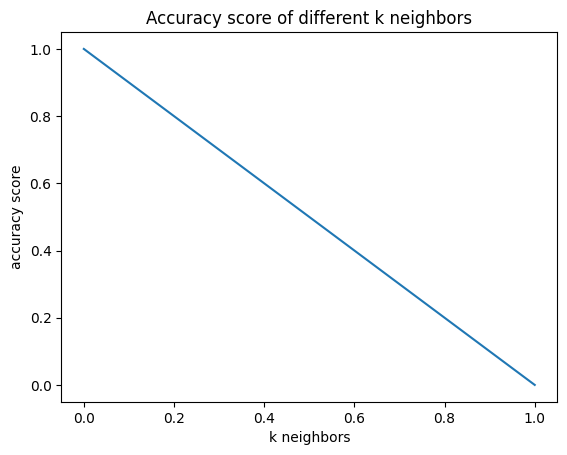

In [48]:
plt.plot(scores)
plt.title('Accuracy score of different k neighbors')
plt.xlabel('k neighbors')
plt.ylabel('accuracy score')